In [2]:
import csv
import random
from shutil import copyfile
from pycocotools.coco import COCO
from tqdm import tqdm

import matplotlib.pyplot as plt
import nltk

In [ ]:
# # make directory and get annotations for training and testing
# !mkdir data
# # !wget http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip -P ./data/
# !unzip ./data/captions_train-val2014.zip -d ./data/
# !rm ./data/captions_train-val2014.zip
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test

In [3]:
coco = COCO('./data/annotations/captions_train2014.json')

loading annotations into memory...
Done (t=1.00s)
creating index...
index created!


In [4]:
#get ids of training images
with open('train_ids.csv', 'r') as f:
    reader = csv.reader(f)
    trainIds = list(reader)
    
trainIds = [int(i) for i in trainIds[0]]

with open('val_ids.csv', 'r') as f:
    reader = csv.reader(f)
    valIds = list(reader)
    
valIds = [int(i) for i in valIds[0]]

In [5]:
for img_id in trainIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/train/'+path)
for img_id in valIds:
    path = coco.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/train2014/'+path, './data/images/val/'+path)

In [3]:
cocoTest = COCO('./data/annotations/captions_val2014.json')

loading annotations into memory...
Done (t=0.51s)
creating index...
index created!


In [8]:
with open('test_ids.csv', 'r') as f:
    reader = csv.reader(f)
    testIds = list(reader)
    
testIds = [int(i) for i in testIds[0]]

In [9]:
for img_id in testIds:
    path = cocoTest.loadImgs(img_id)[0]['file_name']
    copyfile('/datasets/COCO-2015/val2014/'+path, './data/images/test/'+path)

In [10]:
print("done")

done


Actual Captions:
a pristine doctors examining room waiting for the next patient .
a view of a room inside a doctors office .
a medical examination room with a bed for the patient and a stool for the doctor .
a picture of a medical exam room with a bed and chair
a doctors patient room with a bed next to a table with stuff on it .


Predicted Caption: a bathroom with a toilet and a sink
Model: LSTM (baseline)
img_id: 211192
bleu1: 0.487
bleu4: 0.016


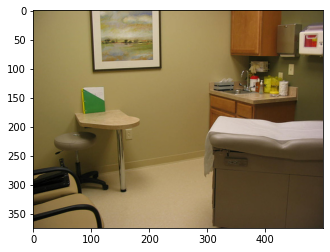

In [25]:
# Properly displaying the outputs shown in the terminal
actual_captions = [['a', 'pristine', 'doctors', 'examining', 'room', 'waiting', 'for', 'the', 'next', 'patient', '.'], ['a', 'view', 'of', 'a','room', 'inside', 'a', 'doctors', 'office', '.'], ['a', 'medical', 'examination', 'room', 'with', 'a', 'bed', 'for', 'the', 'patient', 'and', 'a', 'stool', 'for', 'the', 'doctor', '.'], ['a', 'picture', 'of', 'a', 'medical', 'exam', 'room', 'with', 'a', 'bed', 'and', 'chair'], ['a', 'doctors', 'patient', 'room', 'with', 'a', 'bed', 'next', 'to', 'a', 'table', 'with', 'stuff', 'on', 'it', '.']]
predicted_captions = ['a', 'bathroom', 'with', 'a', 'toilet', 'and', 'a', 'sink'] 
id_num = 211192
bleu1 = 0.487
bleu4 = 0.016

path = cocoTest.loadImgs(id_num)[0]['file_name']
img = plt.imread('/datasets/COCO-2015/val2014/'+ str(path))
plt.imshow(img)

print("Actual Captions:")
actual_captions =  [" ".join(i) for i in actual_captions]
predicted_captions = " ".join([i for i in predicted_captions])

for i in actual_captions:
    print(i)

print("\n")

print("Predicted Caption: " + str(predicted_captions))
print("Model: LSTM (baseline)")
print("img_id: " + str(id_num))
print("bleu1: " + str(bleu1))
print("bleu4: " + str(bleu4))

In [3]:
annIds = cocoTest.getAnnIds(imgIds=173553);
anns = cocoTest.loadAnns(annIds)
print([nltk.word_tokenize(x['caption'].lower()) for x in anns])

[['a', 'man', 'wearing', 'a', 'yellow', 'bandanna', 'holding', 'a', 'tennis', 'racquet', '.'], ['a', 'man', 'is', 'running', 'with', 'a', 'tennis', 'racquet', 'in', 'his', 'hand', 'as', 'a', 'camera', 'operator', 'follows', 'him', '.'], ['a', 'man', 'running', 'on', 'a', 'tennis', 'court', ',', 'racket', 'in', 'hand'], ['a', 'camera', 'man', 'wearing', 'a', 'red', 'shirt', 'aims', 'his', 'camera', 'at', 'a', 'tennis', 'player', 'who', 'is', 'wearing', 'a', 'yellow', 'bandanna', 'and', 'a', 'blue', 'shirt', 'and', 'a', 'tennis', 'racket', '.'], ['to', 'keep', 'up', 'with', 'the', 'action', ',', 'the', 'media', 'people', 'need', 'to', 'be', 'as', 'fast', 'as', 'the', 'players', '.']]


In [44]:
string = 'a laptop computer sitting on top of a desk .'
print(nltk.word_tokenize(string))

['a', 'laptop', 'computer', 'sitting', 'on', 'top', 'of', 'a', 'desk', '.']
